In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Importing Keras for neural networks
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Load Boston dataset
data = pd.read_csv("/content/Boston (1).csv")

In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<ipython-input-6-ddb1e0d59d89>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.MEDV)


<Axes: xlabel='MEDV', ylabel='Density'>

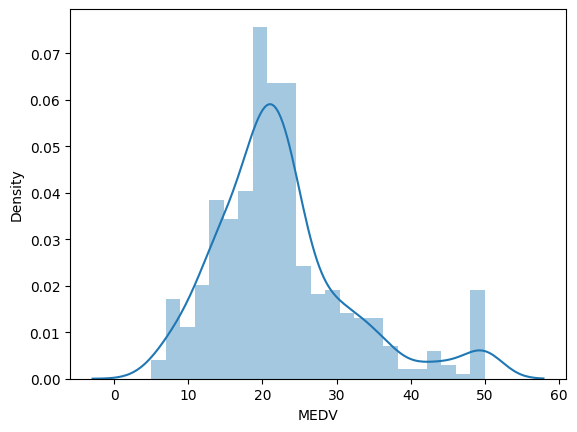

In [ ]:
sns.distplot(data.MEDV)

<Axes: ylabel='MEDV'>

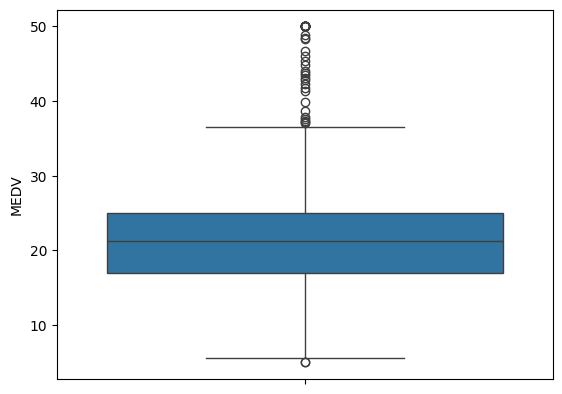

In [ ]:
sns.boxplot(data.MEDV)

In [ ]:
X = data.iloc[:, :-1]
y = data.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_lr = regressor.predict(X_test)

In [ ]:
# Model Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [ ]:
# Neural Networks
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
12/12 [==============================] - 4s 98ms/step - loss: 584.7471 - mae: 22.3259 - val_loss: 478.4720 - val_mae: 20.3992
Epoch 2/100
12/12 [==============================] - 0s 27ms/step - loss: 510.5914 - mae: 20.5416 - val_loss: 385.2809 - val_mae: 18.0909
Epoch 3/100
12/12 [==============================] - 0s 21ms/step - loss: 368.0929 - mae: 16.8471 - val_loss: 210.1281 - val_mae: 12.6177
Epoch 4/100
12/12 [==============================] - 0s 18ms/step - loss: 159.0297 - mae: 10.2941 - val_loss: 62.3660 - val_mae: 5.3547
Epoch 5/100
12/12 [==============================] - 0s 14ms/step - loss: 89.8666 - mae: 7.4904 - val_loss: 58.8314 - val_mae: 4.6988
Epoch 6/100
12/12 [==============================] - 0s 22ms/step - loss: 51.6374 - mae: 5.5157 - val_loss: 59.2083 - val_mae: 4.6636
Epoch 7/100
12/12 [==============================] - 0s 10ms/step - loss: 33.7701 - mae: 4.3118 - val_loss: 54.9500 - val_mae: 4.6882
Epoch 8/100
12/12 [=============================

In [ ]:
# Evaluation of the model
y_pred_nn = model.predict(X_test)
mse_nn, mae_nn = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 8ms/step - loss: 11.8190 - mae: 2.2166


In [ ]:
# Make predictions on new data
new_data = scaler.transform([[0.1, 10.0, 5.0, 0, 0.4, 6.0, 50, 6.0, 1, 400, 20, 300, 10]])
prediction = model.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step


In [ ]:
# Outputting results
print('Linear Regression - Mean squared error on test data:', mse_lr)
print('Linear Regression - Mean absolute error on test data:', mae_lr)
print('Linear Regression - R2 score:', r2_lr)
print('Neural Network - Mean squared error on test data:', mse_nn)
print('Neural Network - Mean absolute error on test data:', mae_nn)
print('Predicted house price:', prediction)

Linear Regression - Mean squared error on test data: 24.291119474973527
Linear Regression - Mean absolute error on test data: 3.189091965887848
Linear Regression - R2 score: 0.6687594935356318
Neural Network - Mean squared error on test data: 11.819026947021484
Neural Network - Mean absolute error on test data: 2.216578722000122
Predicted house price: [[15.033751]]
